# General Trends Analysis

Within this notebook, I conduct a simple analysis of trends within the Citibike trip data based on the starttime variable of a Citibike trip. In particular, I look at monthly trends and trips broken down by hours of a day.

### Import Necessary Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.io import gbq
import os
%matplotlib inline

In [2]:
project_id = os.environ['project_id']

### Monthly Trips Query

In the following query, Citibike trips are aggregated by the month and year of their starttime value. In addition, the total number of trips (num_trip) and average trip duration (avg_trip) by month and year are computed.

In [3]:
monthly_trips_query="""
SELECT MONTH(starttime) as trip_month, YEAR(starttime) as trip_year, COUNT(tripduration) as num_trip, AVG(tripduration) as avg_trip 
FROM 
  [bigquery-public-data:new_york.citibike_trips],
  [citibike_tripdata.tripdata_2016_10_to_2017_12],
  [citibike_tripdata.tripdata_jc_2015_09_to_2017_12] 
GROUP BY trip_month, trip_year ORDER BY trip_year, trip_month
"""

trips_by_month_year = gbq.read_gbq(query=monthly_trips_query,dialect ='legacy', project_id=project_id)
trips_by_month_year.head()

Requesting query... ok.
Job ID: 273c8fd1-9bc2-4364-8275-51352fb780a4
Query running...
Query done.
Processed: 821.9 MB Billed: 822.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 54 rows.

Total time taken 3.05 s.
Finished at 2018-03-26 01:35:54.


,trip_month,trip_year,num_trip,avg_trip
0,7,2013,843416,998.100704
1,8,2013,1001958,979.580227
2,9,2013,1034359,905.020577
3,10,2013,1037712,825.614754
4,11,2013,675774,771.283866


As displayed above, the query request will yield a DataFrame that lists number of trips and average trip durations by month and year. For instance, the top entry has 843,416 trips with an average trip duration of 998 seconds for July 2013. We can dig deeper by taking a look at some descriptive statistics below. In turn, we can take note of a few points of interest:
- 54 months represented for the period from July 2013 to December 2017
- average of 997,445.9 total trips per month
- range of 196,930 to 1,932,511 total trips per month
- average of 906.1 seconds average trip time per month
- range of 649.3 to 1,150.7 seconds average trip time per month  

In [4]:
trips_by_month_year.describe()

,trip_month,trip_year,num_trip,avg_trip
count,54.000000,54.000000,5.400000e+01,54.000000
mean,6.833333,2015.222222,9.974459e+05,906.123124
std,3.468184,1.327029,4.551352e+05,120.790077
min,1.000000,2013.000000,1.969300e+05,649.383207
25%,4.000000,2014.000000,6.917310e+05,813.407381
50%,7.000000,2015.000000,9.579365e+05,901.510703
75%,10.000000,2016.000000,1.280217e+06,996.112327
max,12.000000,2017.000000,1.932511e+06,1150.770650


A variable called trip_year_month is used to represent a combination of month and year for graphing purposes.

In [5]:
format_func = lambda x: str(x).zfill(2)
trips_by_month_year['trip_year_month'] = trips_by_month_year["trip_year"].map(str) + trips_by_month_year["trip_month"].map(format_func)

In [6]:
trips_by_month_year.head()

,trip_month,trip_year,num_trip,avg_trip,trip_year_month
0,7,2013,843416,998.100704,201307
1,8,2013,1001958,979.580227,201308
2,9,2013,1034359,905.020577,201309
3,10,2013,1037712,825.614754,201310
4,11,2013,675774,771.283866,201311


### Number of Trips by Month

Below is a barplot of total number of trips by month and year. In general, we note a cyclic behavior where ridership peaks during summer seasons and dips during winter seasons. Additionally, there is a general upward trend across the entire lifetime of Citibike. This increased ridership can be explained by the gradual expansion of Citibike's operations from Manhattan to Brooklyn, Queens, and Jersey City.

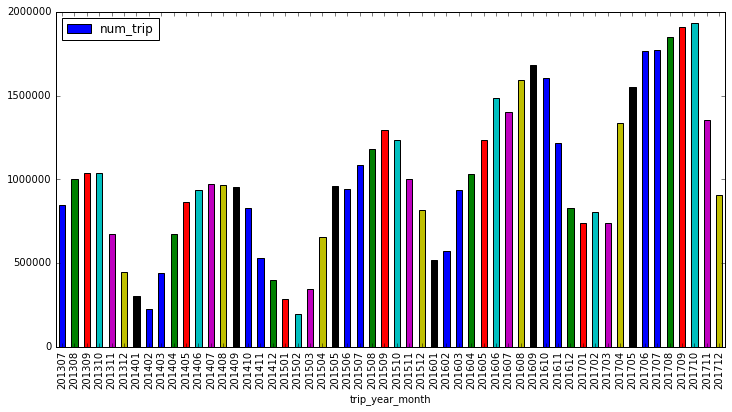

In [7]:
trips_by_month_year.plot(x='trip_year_month', y='num_trip', kind='bar', figsize=(12,6))

### Average Trip Duration by Month

Below is a barplot of average trip duration by month and year. In general, we note that the average trip duration seems to dip during the winter seasons, but not much else can be particularly inferred. More data would need to be investigated to assess which factors lead to changes in average trip duration.

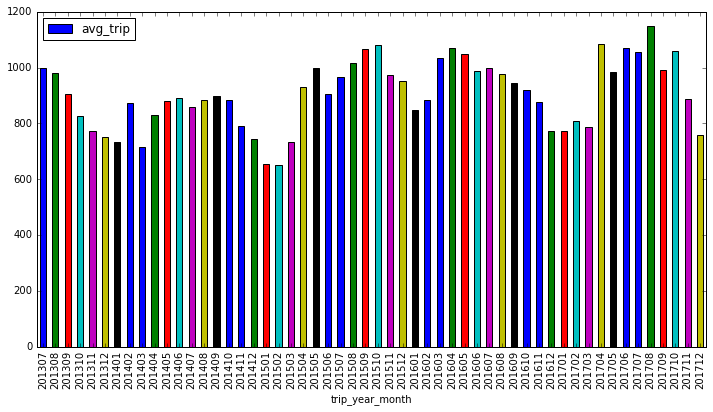

In [8]:
trips_by_month_year.plot(x='trip_year_month', y='avg_trip', kind='bar', figsize=(12,6))

### Day Breakdown Query

In the following query, all Citibike trips are aggregated by hour of the day from their starttime value. In addition, the total number of trips (num_trip) and average trip duration (avg_trip) by month and year are computed.

In [9]:
trips_by_hour_query="""
SELECT HOUR(starttime) as hour, COUNT(tripduration) as num_trip, AVG(tripduration) as avg_trip  
FROM 
  [bigquery-public-data:new_york.citibike_trips],
  [citibike_tripdata.tripdata_2016_10_to_2017_12],
  [citibike_tripdata.tripdata_jc_2015_09_to_2017_12]
GROUP BY hour ORDER BY hour
"""

trips_by_hour = gbq.read_gbq(query=trips_by_hour_query,dialect ='legacy', project_id=project_id)
trips_by_hour.head()

Requesting query... ok.
Job ID: a5fcd12b-ed7a-4111-8f51-afc25201b255
Query running...
Query done.
Processed: 821.9 MB Billed: 822.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 24 rows.

Total time taken 2.98 s.
Finished at 2018-03-26 01:36:57.


,hour,num_trip,avg_trip
0,0,503260,971.179259
1,1,279703,1052.176498
2,2,163781,1080.449997
3,3,100823,1065.565536
4,4,96266,1229.489020


Comments on Descriptive Stats:
- average of 2,244,253 total trips by hour bucket
- range of 96,266 to 5,291,370 total trips by hour bucket
- average of 959.4 seconds average trip duration by hour bucket
- range of 683.5 to 1229.5 seconds average trip duration by hour bucket

In [10]:
trips_by_hour.describe()

,hour,num_trip,avg_trip
count,24.000000,2.400000e+01,24.000000
mean,11.500000,2.244253e+06,959.360899
std,7.071068,1.598273e+06,126.686525
min,0.000000,9.626600e+04,683.451056
25%,5.750000,7.614992e+05,940.456111
50%,11.500000,2.397461e+06,966.872301
75%,17.250000,3.325364e+06,1035.206886
max,23.000000,5.291370e+06,1229.489020


### Number of Trips by Hour Bucket

Below is a barplot of number of trips broken down by hour of the day. In general, the hours from 10PM to 6AM represent a period of significantly low ridership, with 1AM to 5AM being extremely low. Additionally, peak hours of usage are at 8AM as well as at 5PM and 6PM, the times when people normally get to or off of work.

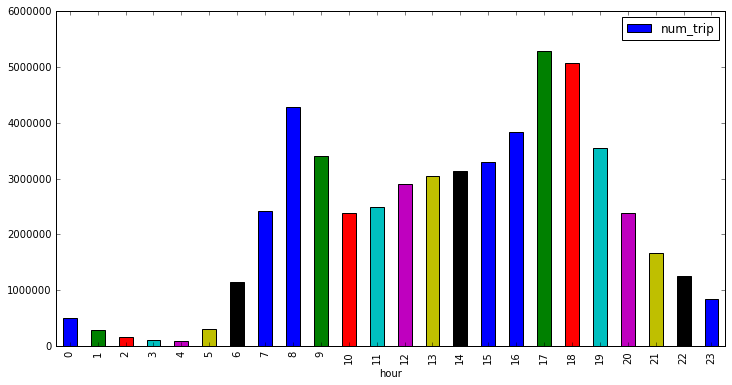

In [11]:
trips_by_hour.plot(x='hour', y='num_trip', kind='bar', figsize=(12,6))

### Average Trip Duration by Hour Bucket

Below is a barplot of average trip duration broken down by hour of the day. Generally, the average trip duration throughout the day seems to consistently hover around the mean of 959 seconds, although there is a major discrepancy in duration between 4AM and 5AM. Due to low ridership during the early morning, individual riders at these hours have a greater impact on average trip duration with their specific riding behaviors. Additionally, there seems to be a slight upward trend in duration from 5AM to 11AM.

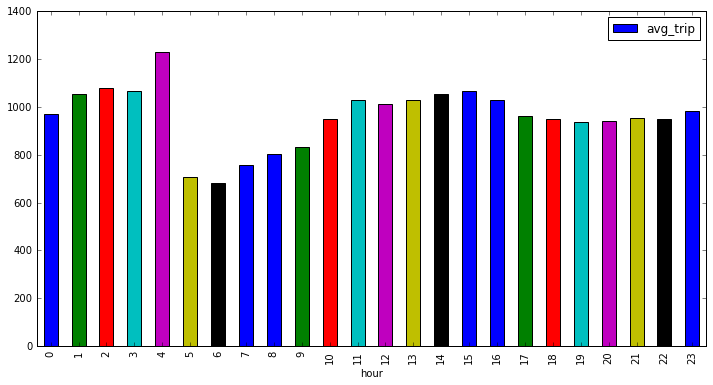

In [12]:
trips_by_hour.plot(x='hour', y='avg_trip', kind='bar', figsize=(12,6))

### Weekdays in 2017 Breakdown Query

Similarly to above, Citibike trips are aggregated by hour of the day from their starttime value. In addition, the total number of trips (num_trip) and average trip duration (avg_trip) by month and year are computed. The main difference is that we only look at weekdays in 2017.

In [13]:
trips_by_hour_weekday_query="""
SELECT HOUR(starttime) as hour, COUNT(tripduration) as num_trip, AVG(tripduration) as avg_trip  
FROM 
  [bigquery-public-data:new_york.citibike_trips],
  [citibike_tripdata.tripdata_2016_10_to_2017_12],
  [citibike_tripdata.tripdata_jc_2015_09_to_2017_12]
WHERE DAYOFWEEK(starttime) != 1 and DAYOFWEEK(starttime) != 7 and YEAR(starttime) == 2017
GROUP BY hour ORDER BY hour
"""

trips_by_hour_weekday = gbq.read_gbq(query=trips_by_hour_weekday_query,dialect ='legacy', project_id=project_id)
trips_by_hour_weekday.head()

Requesting query... ok.
Job ID: b5db5981-e1e4-4b19-88bf-8f48ab469a7b
Query running...
Query done.
Processed: 821.9 MB Billed: 822.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 24 rows.

Total time taken 3.43 s.
Finished at 2018-03-26 01:37:33.


,hour,num_trip,avg_trip
0,0,86147,1132.159727
1,1,40426,932.874116
2,2,20548,1175.841980
3,3,11918,1419.054288
4,4,18150,1218.532342


Comments on Descriptive Stats:
- average of 526,434.5 total trips by hour bucket
- range of 11,918 to 1,325,535 total trips by hour bucket
- average of 977.9 seconds average trip duration by hour bucket
- range of 626.7 to 1419.1 seconds average trip duration by hour bucket

In [14]:
trips_by_hour_weekday.describe()

,hour,num_trip,avg_trip
count,24.000000,2.400000e+01,24.000000
mean,11.500000,5.264345e+05,977.874200
std,7.071068,4.053041e+05,177.402327
min,0.000000,1.191800e+04,626.682645
25%,5.750000,1.572510e+05,920.058662
50%,11.500000,5.331730e+05,975.446727
75%,17.250000,7.494982e+05,1071.689156
max,23.000000,1.325535e+06,1419.054288


### Number of Trips by Hour Bucket for Weekdays in 2017

Below is a barplot of number of trips broken down by hour of the day for weekdays in 2017. Not surprisingly, this plot is similar to its counterpart for all trips above. The weekday data illustrate the patterns of peak hours around the endpoints of the usual work schedule and lack of usage in the early morning.

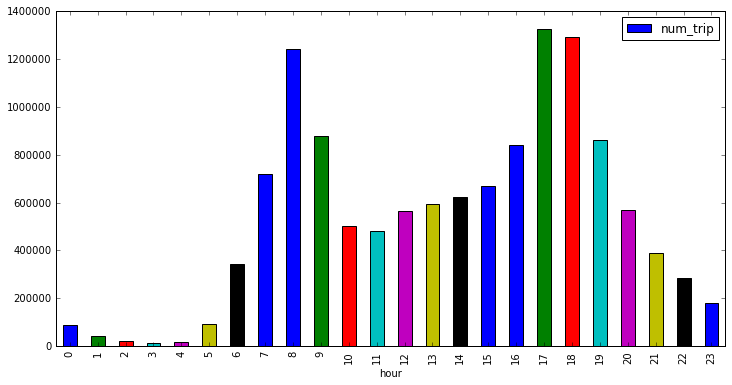

In [15]:
trips_by_hour_weekday.plot(x='hour', y='num_trip', kind='bar', figsize=(12,6))

### Average Trip Duration by Hour Bucket for Weekdays in 2017

Below is a barplot of average trip duration broken down by hour of the day for weekdays in 2017. Similarly to its counterpart above, there is a discrepancy of about 600 seconds between 4AM to 5AM and upward trend from 5AM to 12PM. Interestingly, there is a peak average trip duration of 1,419 seconds at 3AM, although this could be heavily influenced by outliers due to low ridership at that time. 

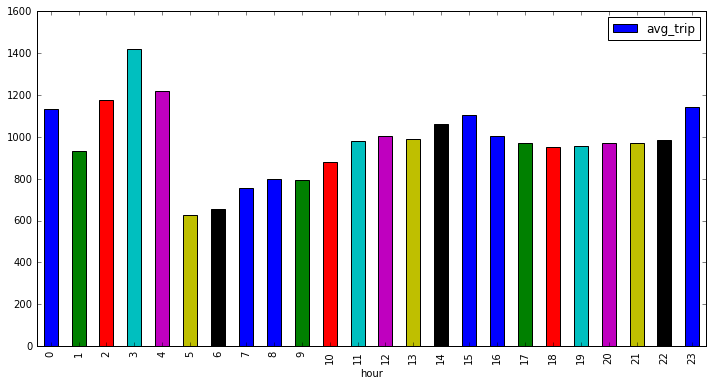

In [16]:
trips_by_hour_weekday.plot(x='hour', y='avg_trip', kind='bar', figsize=(12,6))

### Weekends in 2017 Breakdown Query

Similarly to above, Citibike trips are aggregated by hour of the day from their starttime value. In addition, the total number of trips (num_trip) and average trip duration (avg_trip) by month and year are computed. The main difference is that we only look at weekends in 2017.

In [17]:
trips_by_hour_weekend_query="""
SELECT HOUR(starttime) as hour, COUNT(tripduration) as num_trip, AVG(tripduration) as avg_trip  
FROM 
  [bigquery-public-data:new_york.citibike_trips],
  [citibike_tripdata.tripdata_2016_10_to_2017_12],
  [citibike_tripdata.tripdata_jc_2015_09_to_2017_12]
WHERE (DAYOFWEEK(starttime) == 1 or DAYOFWEEK(starttime) == 7) and YEAR(starttime) == 2017
GROUP BY hour ORDER BY hour
"""

trips_by_hour_weekend = gbq.read_gbq(query=trips_by_hour_weekend_query,dialect ='legacy', project_id=project_id)
trips_by_hour_weekend.head()

Requesting query... ok.
Job ID: 5d8cb709-2c91-4dbc-b8da-a177c4b62f5d
Query running...
Query done.
Processed: 821.9 MB Billed: 822.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 24 rows.

Total time taken 3.0 s.
Finished at 2018-03-26 01:38:06.


,hour,num_trip,avg_trip
0,0,58066,1036.785761
1,1,39011,1351.138320
2,2,24345,1055.552968
3,3,15487,1046.448053
4,4,9728,1121.117701


Comments on Descriptive Stats:

- average of 167,714.9 total trips by hour bucket
- range of 8,768 to 346,528 total trips by hour bucket
- average of 1114.1 seconds average trip duration by hour bucket
- range of 809.8 to 1366.6 seconds average trip duration by hour bucket

In [18]:
trips_by_hour_weekend.describe()

,hour,num_trip,avg_trip
count,24.000000,24.000000,24.000000
mean,11.500000,167714.875000,1114.152381
std,7.071068,130111.578125,150.730087
min,0.000000,8768.000000,809.812170
25%,5.750000,48245.000000,1044.032480
50%,11.500000,141842.500000,1127.674908
75%,17.250000,302344.500000,1224.210420
max,23.000000,346528.000000,1366.562207


### Number of Trips by Hour Bucket for Weekends in 2017

Below is a barplot of number of trips broken down by hour of the day for weekdays in 2017. Compared to the barplot for weekday data, the below barplot shows a dramatic departure from the usual work schedule pattern. While there is still a lack of ridership in the early morning, there is a smooth bell shaped curve present, peaking at 3PM. Whether for transit or leisure, Citibike usage over the weekend is most prominent in the midday. 

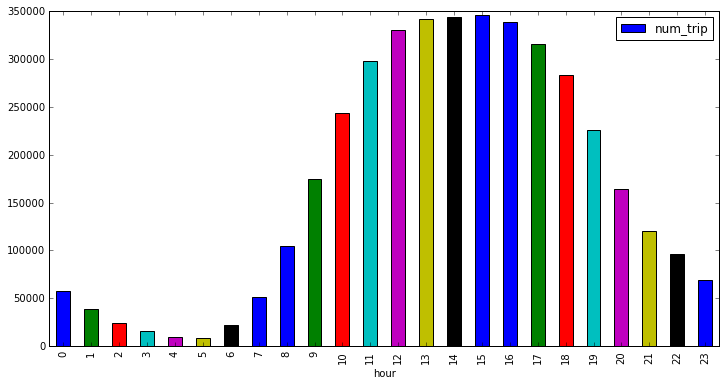

In [19]:
trips_by_hour_weekend.plot(x='hour', y='num_trip', kind='bar', figsize=(12,6))

### Average Trip Duration by Hour Bucket for Weekends in 2017

Below is a barplot of average trip duration broken down by hour of the day for weekdays in 2017. As expressed in the descriptive statistics above, the average trip duration overall for weekend data seems to be higher than that of weekday data. This could be due to Citibike being used more for leisure as opposed to a form of transit for work. There is a minor dip in duration from 6AM to 8AM and a spike in duration at 1AM.

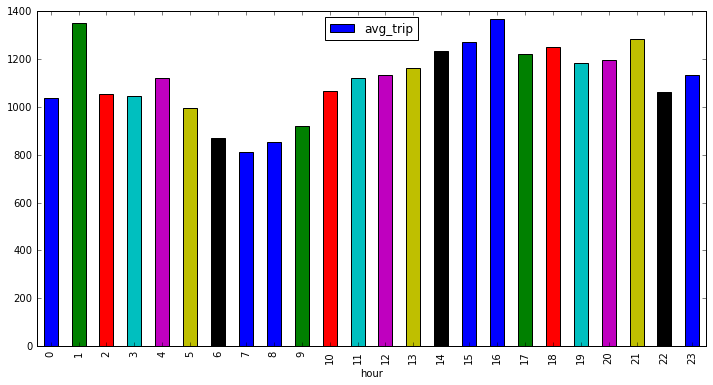

In [20]:
trips_by_hour_weekend.plot(x='hour', y='avg_trip', kind='bar', figsize=(12,6))